# Демо блокнот к Лекции №2. Предварительная обработка данных

## Имортируем нужные зависимости

In [1]:
import numpy as np
import pandas as pd

## Загружаем наш демо-датасет

In [2]:
df = pd.read_excel(r'D:\Datasets\Telco_customer_churn.xlsx', sheet_name='Telco_Churn')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [4]:
tenure_months = df['Tenure Months']
tenure_months.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

## Масштабирование и нормализация

### Min-Max scaling

In [5]:
min_tenure = tenure_months.min()
max_tenure = tenure_months.max()

tenure_months_scaled = (tenure_months - min_tenure) / (max_tenure - min_tenure)
tenure_months_scaled.describe()

count    7043.000000
mean        0.449599
std         0.341104
min         0.000000
25%         0.125000
50%         0.402778
75%         0.763889
max         1.000000
Name: Tenure Months, dtype: float64

In [6]:
def min_max_scaling(x: pd.Series) -> pd.Series:
    min_x = x.min()
    max_x = x.max()
    return (x - min_x) / (max_x - min_x)

In [7]:
df['Churn Score'].describe()

count    7043.000000
mean       58.699418
std        21.525131
min         5.000000
25%        40.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: Churn Score, dtype: float64

In [8]:
df['Churn Score'] = min_max_scaling(df['Churn Score'])
df['Churn Score'].describe()

count    7043.000000
mean        0.565257
std         0.226580
min         0.000000
25%         0.368421
50%         0.589474
75%         0.736842
max         1.000000
Name: Churn Score, dtype: float64

## Стандартизация

In [9]:
df['CLTV'].describe()

count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64

<Axes: title={'center': 'CLTV Distribution'}, ylabel='Frequency'>

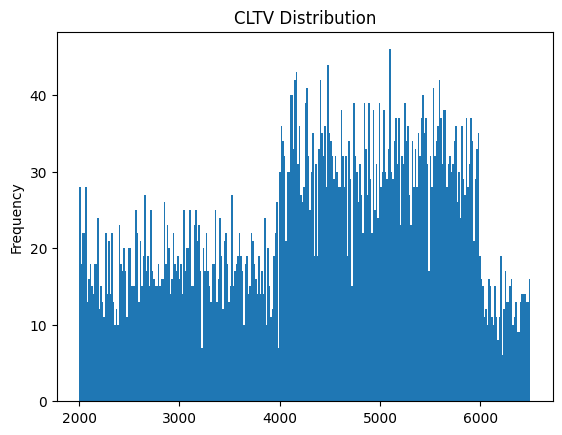

In [10]:
df['CLTV'].plot(kind='hist', bins=300, title='CLTV Distribution')

<Axes: title={'center': 'Standardized CLTV Distribution'}, ylabel='Frequency'>

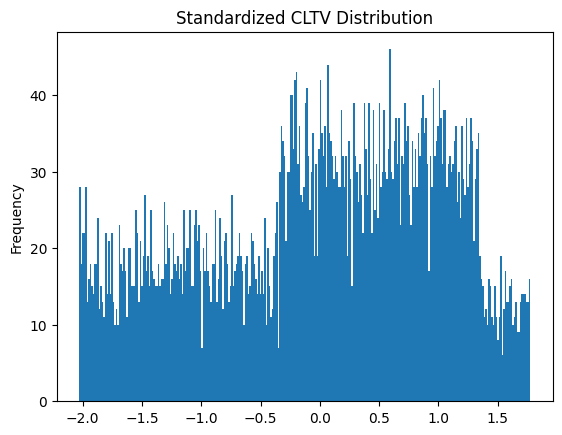

In [11]:
def standardization(x: pd.Series) -> pd.Series:
    mean_x = x.mean()
    std_x = x.std()
    return (x - mean_x) / std_x

df['CLTV'] = standardization(df['CLTV'])
df['CLTV'].plot(kind='hist', bins=300, title='Standardized CLTV Distribution')

In [12]:
df['CLTV'].describe()

count    7.043000e+03
mean    -2.824818e-16
std      1.000000e+00
min     -2.026357e+00
25%     -7.871942e-01
50%      1.070990e-01
75%      8.285350e-01
max      1.774812e+00
Name: CLTV, dtype: float64

## Кодирование категориальных признаков

Прежде чем реализовывать конкретные методы и смотреть как они работают, посмотрим на категориальные признаки в наших данных и сколько в них уникальных значений.

In [13]:
df.select_dtypes(include=['object']).nunique()

CustomerID           7043
Country                 1
State                   1
City                 1129
Lat Long             1652
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Total Charges        6531
Churn Label             2
Churn Reason           20
dtype: int64

In [14]:
df['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [15]:
def one_hot_encoding(x: pd.Series) -> pd.DataFrame:
    encoding = np.zeros((x.shape[0], x.nunique()))
    codes = x.astype('category').cat.codes
    encoding[np.arange(x.shape[0]), codes] = 1
    
    return pd.DataFrame(encoding, columns=x.astype('category').cat.categories)


one_hot_encoding(df['Payment Method'])


,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
7038,1.0,0.0,0.0,0.0
7039,0.0,0.0,0.0,1.0
7040,0.0,1.0,0.0,0.0
7041,0.0,0.0,1.0,0.0


### Ordinal Encoding

In [16]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [17]:
categories = ['Month-to-month', 'One year', 'Two year']

In [18]:
def ordinal_encoding(x: pd.Series, categories: list) -> pd.Series:
    dtype = pd.CategoricalDtype(categories=categories, ordered=True)
    x_cat = x.astype(dtype)
    
    return pd.Series(x_cat.cat.codes, index=x.index, name=x.name)

In [60]:
ordinal_encoding(df['Contract'], categories)

0       0
1       0
2       0
3       0
4       0
       ..
7038    2
7039    1
7040    1
7041    0
7042    2
Name: Contract, Length: 7043, dtype: int8

### Count Encoding

In [19]:
def count_encoding(x: pd.Series) -> pd.Series:
    value_counts = x.value_counts()
    
    return x.map(value_counts)

**Series.map(arg, na_action=None)**

Map values of Series according to an input mapping or function.

Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.

https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

In [20]:
count_encoding(df['Payment Method'])

0       1612
1       2365
2       2365
3       2365
4       1544
        ... 
7038    1544
7039    1612
7040    1522
7041    2365
7042    1544
Name: Payment Method, Length: 7043, dtype: int64

### Frequency Encoding

In [21]:
def frequency_encoding(x: pd.Series) -> pd.Series:
    value_counts = x.value_counts(normalize=True)
    
    return x.map(value_counts)

In [22]:
frequency_encoding(df['Payment Method'])

0       0.228880
1       0.335794
2       0.335794
3       0.335794
4       0.219225
          ...   
7038    0.219225
7039    0.228880
7040    0.216101
7041    0.335794
7042    0.219225
Name: Payment Method, Length: 7043, dtype: float64

## Обработка временных признаков

Для демонстрации возможностей Pandas для работы с временными признаками, загрузим новый демо-датасет от Open Power System Data (OPSD) по Герамании Германии, которая в последние годы стремительно наращивает производство возобновляемой энергии. Набор данных включает в себя общие для всей страны показатели потребления электроэнергии, производства энергии ветра и солнечной энергии за 2006-2017 годы.

In [23]:
opsd = pd.read_csv(r'D:\Datasets\opsd_germany_daily.csv', delimiter=',')
opsd.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [24]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


**Пояснения к колонкам**
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh


Прежде чем мы начнем работать с данными OPSD, давайте посмотрим на структуру данных pandas для работы с датой и временем: `Timestamp`. 

Мы можем использовать функцию to_datetime() для создания временных меток из строк в самых разных форматах даты/времени.

In [25]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [26]:

pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [27]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

In [28]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'], format='mixed')

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

Теперь обработаем наши данные

In [29]:
opsd['Date'] = pd.to_datetime(opsd['Date'], format='%Y-%m-%d')

opsd['Date'].head()

0   2006-01-01
1   2006-01-02
2   2006-01-03
3   2006-01-04
4   2006-01-05
Name: Date, dtype: datetime64[ns]

### POSIX timestamp

Превращаем дату во время в секундах от эпохи Unix (1970-01-01).
Это даёт простое число — удобно хранить, но плохо для моделей, потому что:
- разница в секундах отражает длительность, но
- модель не понимает цикличности (например, 31 декабря и 1 января очень близки, а timestamp делает их «далёкими»).

In [30]:
opsd['ts'] = opsd['Date'].astype('int64') // 10**9
opsd['ts'].head()

0    1136073600
1    1136160000
2    1136246400
3    1136332800
4    1136419200
Name: ts, dtype: int64

In [31]:
opsd['Date'].dt.second

0       0
1       0
2       0
3       0
4       0
       ..
4378    0
4379    0
4380    0
4381    0
4382    0
Name: Date, Length: 4383, dtype: int32

### Категориальное кодирование признаков даты

Разбиваем дату на компоненты:
- год
- месяц
- день
- (можно ещё день недели, номер недели)

Дальше можно:
- оставить их как числа (ordinal encoding),
- или перевести в one-hot (например, месяц вектором из 12 признаков).

In [32]:
opsd['year'] = opsd['Date'].dt.year
opsd['month'] = opsd['Date'].dt.month
opsd['day'] = opsd['Date'].dt.day

opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar,ts,year,month,day
0,2006-01-01,1069.184,NaN,NaN,NaN,1136073600,2006,1,1
1,2006-01-02,1380.521,NaN,NaN,NaN,1136160000,2006,1,2
2,2006-01-03,1442.533,NaN,NaN,NaN,1136246400,2006,1,3
3,2006-01-04,1457.217,NaN,NaN,NaN,1136332800,2006,1,4
4,2006-01-05,1477.131,NaN,NaN,NaN,1136419200,2006,1,5


### Циклическое кодирование

Чтобы учесть цикличность признаков (месяц, день недели, час), переводим их в две координаты по окружности:

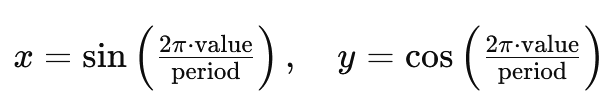

In [33]:
opsd['month_sin'] = np.sin(2 * np.pi * opsd['Date'].dt.month / 12)
opsd['month_cos'] = np.cos(2 * np.pi * opsd['Date'].dt.month / 12)

Теперь январь (1) и декабрь (12) оказываются рядом на круге.

## Обработка аномалий

In [35]:
df['CLTV']

0      -0.981606
1      -1.436360
2       0.821350
3       0.509446
4       0.794302
          ...   
7038    0.765563
7039   -1.910555
7040    0.980261
7041   -1.358595
7042    0.588902
Name: CLTV, Length: 7043, dtype: float64

In [ ]:
df['CLTV'].describe()

count    7.043000e+03
mean    -2.824818e-16
std      1.000000e+00
min     -2.026357e+00
25%     -7.871942e-01
50%      1.070990e-01
75%      8.285350e-01
max      1.774812e+00
Name: CLTV, dtype: float64

In [59]:
def k_std_method(x: np.ndarray | pd.Series, k: int = 3) -> np.ndarray:
    upper_bound = x.mean() + k * x.std()
    lower_bound = x.mean() - k * x.std()
    print(f'Lower: {lower_bound}, Mean: {x.mean()}, Upper: {upper_bound}')
    return (x > upper_bound) | (x < lower_bound)

mask = k_std_method(df['CLTV'], k = 3)
mask

Lower: -3.0000000000000004, Mean: -2.8248184866225763e-16, Upper: 2.9999999999999996


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: CLTV, Length: 7043, dtype: bool

In [61]:
any(mask)

False

In [62]:
df['CLTV'][mask]

Series([], Name: CLTV, dtype: float64)

In [ ]:
normal_data = np.random.normal(loc=0, scale=1, size=1000)  # Основная выборка
outliers = np.array([-5, 5, -4.5, 4.8])  # Искусственные выбросы
x = np.concatenate([normal_data, outliers])

x

array([-0.86113173,  0.37365584, -0.46584603, ...,  5.        ,
       -4.5       ,  4.8       ], shape=(1004,))

In [ ]:
mask = k_std_method(x, k = 3)
mask

Lower: -3.0190137802458734, Mean: 0.0439842736225764, Upper: 3.1069823274910258


array([False, False, False, ...,  True,  True,  True], shape=(1004,))

In [68]:
x[mask], x[mask].shape

(array([-3.19920744, -3.61311917, -3.05252483, -5.        ,  5.        ,
        -4.5       ,  4.8       ]),
 (7,))

In [69]:
x[~mask].shape, x[mask].shape

((997,), (7,))

In [75]:
np.where(mask)

(array([ 362,  792,  914, 1000, 1001, 1002, 1003]),)

In [81]:
def iqr_method(x: np.ndarray | pd.Series, k: float = 1.5) -> np.ndarray:
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    
    return (x < lower_bound) | (x > upper_bound)


mask = iqr_method(df['CLTV'])

In [82]:
any(mask)

False

In [86]:
abb = df['CLTV'].values

abb[mask].shape, np.where(mask)

((0,), (array([], dtype=int64),))

## Обработка пропусков

### Заполнение простыми стаистиками

In [ ]:
opsd['Wind']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4378    394.507
4379    506.424
4380    584.277
4381    721.247
4382    721.176
Name: Wind, Length: 4383, dtype: float64

In [90]:
mean_value = opsd['Wind'].mean()
median_value = opsd['Wind'].median()

In [91]:
opsd['Wind'].fillna(value=mean_value)

0       164.814173
1       164.814173
2       164.814173
3       164.814173
4       164.814173
           ...    
4378    394.507000
4379    506.424000
4380    584.277000
4381    721.247000
4382    721.176000
Name: Wind, Length: 4383, dtype: float64

In [92]:
opsd['Wind'].fillna(value=median_value)

0       119.098
1       119.098
2       119.098
3       119.098
4       119.098
         ...   
4378    394.507
4379    506.424
4380    584.277
4381    721.247
4382    721.176
Name: Wind, Length: 4383, dtype: float64